Import Python librays

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier # gradient boosting

# 1. Load Data

In [72]:
df = pd.read_csv('./cs5228/train.csv')
print("Data type: \n")
print(df.dtypes)
print("\n\n")
print("Data Samples:\n")
print(df.head())

Data type: 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
exceeds50K         int64
dtype: object



Data Samples:

   age workclass  fnlwgt      education  education-num       marital-status  \
0   30         ?  147215   Some-college             10        Never-married   
1   60   Private  173960      Bachelors             13             Divorced   
2   52         ?  105428   Some-college             10   Married-civ-spouse   
3   37   Private  112497      Bachelors             13   Married-civ-spouse   
4   63   Private  137843   Some-college             10   Married-civ-spouse   

        occupation    relationship      sex  capital-gain  capital-loss  \
0                ?       Own-child   Female            

# 2. Preprocess the Data

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
exceeds50K        0
dtype: int64

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,24421,NaN,NaN,NaN,38.587,13.6771,17,28,37,48,90
workclass,24421,9,Private,16863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,24421,NaN,NaN,NaN,188820,104692,12285,117583,177824,236586,1.4904e+06
education,24421,16,HS-grad,7861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,24421,NaN,NaN,NaN,10.0965,2.57449,1,9,10,13,16
marital-status,24421,7,Married-civ-spouse,11223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,24421,15,Prof-specialty,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,24421,6,Husband,9863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,24421,2,Male,16338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,24421,NaN,NaN,NaN,1116.03,7646.59,0,0,0,0,99999


There is no null value in dataset, however some "?" exist in dataset.

In [5]:
df[df['workclass'] == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,0
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,12,United-States,0
47,18,?,128538,Some-college,10,Never-married,?,Own-child,Female,0,0,6,United-States,0
96,34,?,41493,Bachelors,13,Divorced,?,Own-child,Female,0,0,40,United-States,0
188,72,?,31327,Bachelors,13,Married-civ-spouse,?,Husband,Male,0,0,20,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24324,18,?,379768,HS-grad,9,Never-married,?,Own-child,Female,0,0,40,United-States,0
24333,22,?,334593,Some-college,10,Never-married,?,Not-in-family,Male,0,0,40,United-States,0
24354,18,?,340117,11th,7,Never-married,?,Unmarried,Female,0,0,50,United-States,0
24376,67,?,132057,HS-grad,9,Married-civ-spouse,?,Husband,Male,0,0,20,United-States,0


# 3. Analyse Data

Split into **numeric features** & **categorical features**

In [6]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week', 'exceeds50K']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'sex', 'native-country']

# All features
features = []
features.extend(numeric_features)
features.extend(cat_features)

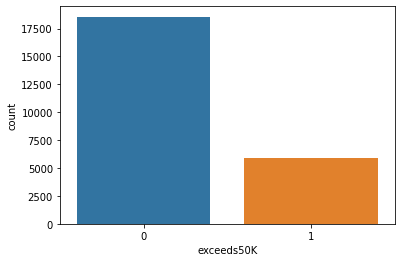

In [7]:
sns.countplot(x='exceeds50K',data=df)
plt.show()

Find the correlation between each `numeric_features` and `exceeds50K`

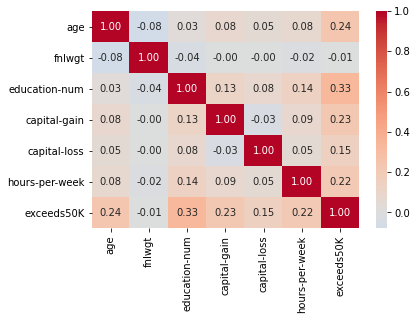

In [8]:
sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", center=0)
plt.show()

`age`, `education-num`, `hours-per-work` have high correlation

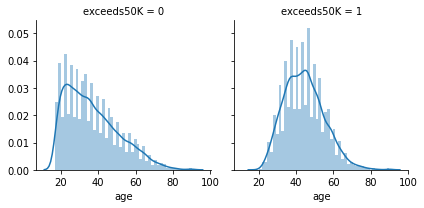

In [9]:
g = sns.FacetGrid(df, col='exceeds50K')
g = g.map(sns.distplot, 'age')
plt.show()

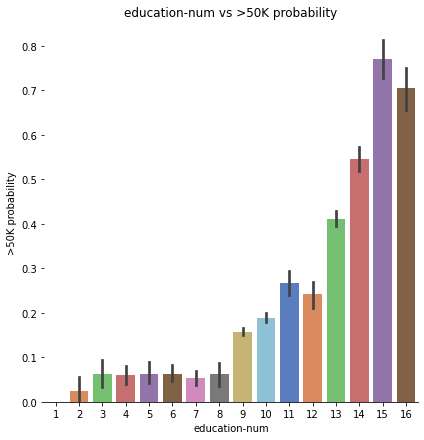

In [10]:
g = sns.catplot(x='education-num', y='exceeds50K', data=df, kind='bar', height=6, palette='muted')
g.despine(left=True)
g.set_ylabels(">50K probability")
plt.title('education-num vs >50K probability')
plt.show()

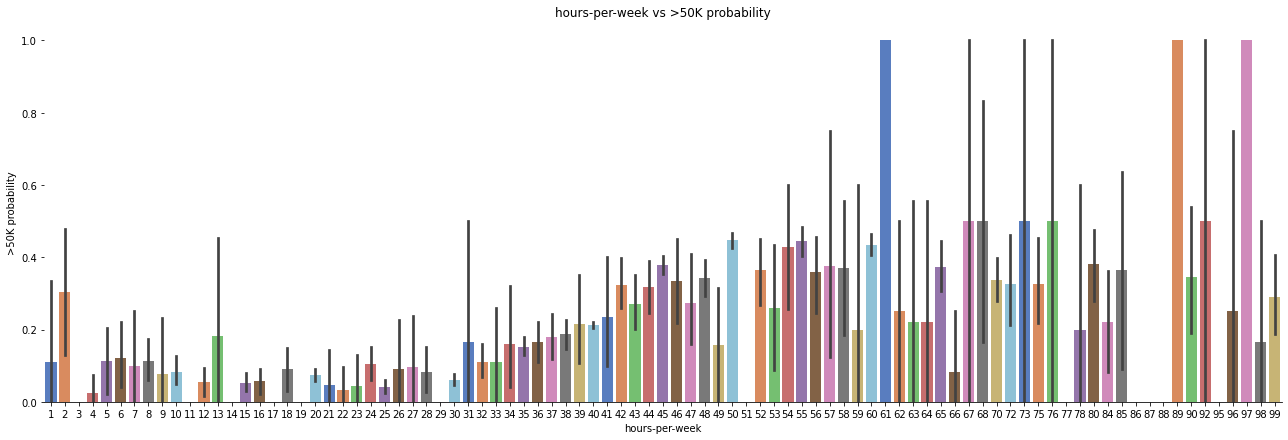

In [11]:
g = sns.catplot(x='hours-per-week', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=3)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('hours-per-week vs >50K probability')
plt.show()

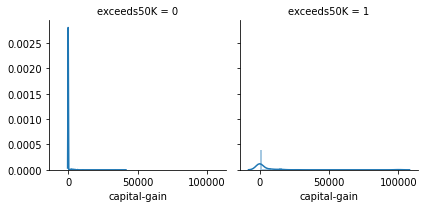

In [12]:
#df['capital-gain'] = pd.cut(df['capital-gain'], [0, 10, 1116, 100000], labels=['Low', 'Mid', 'High'])
g = sns.FacetGrid(df, col='exceeds50K')
g = g.map(sns.distplot, 'capital-gain')
plt.show()

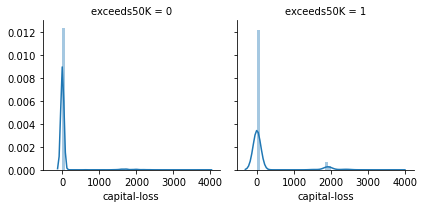

In [13]:
g = sns.FacetGrid(df, col='exceeds50K')
g = g.map(sns.distplot, 'capital-loss')
plt.show()

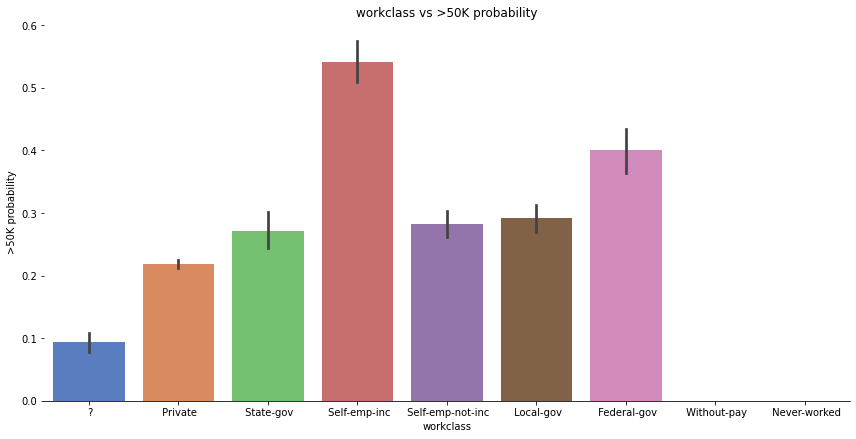

In [14]:
g = sns.catplot(x='workclass', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=2)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('workclass vs >50K probability')
plt.show()

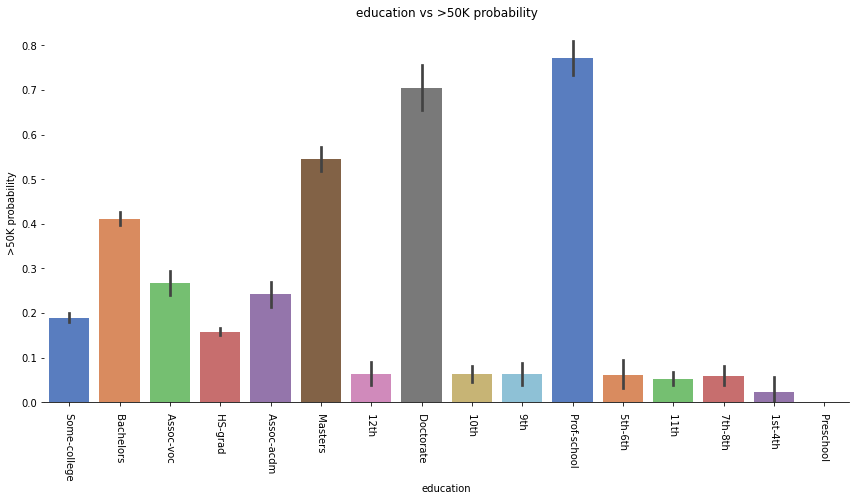

In [15]:
g = sns.catplot(x='education', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=2)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('education vs >50K probability')
plt.xticks(rotation=270)
plt.show()

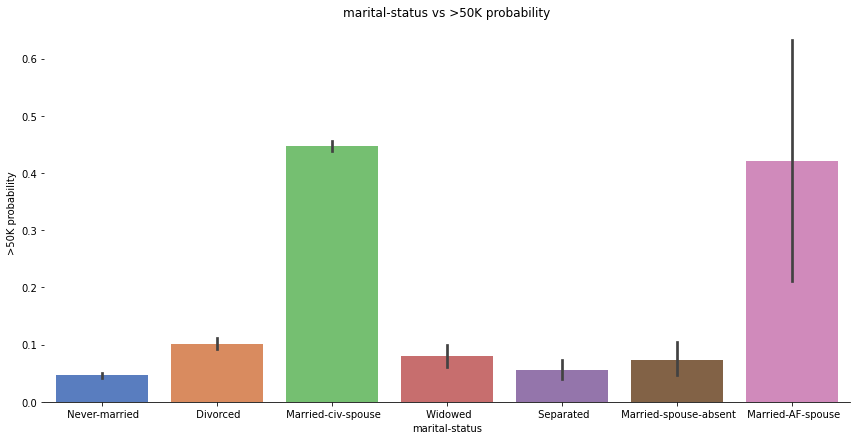

In [16]:
g = sns.catplot(x='marital-status', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=2)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('marital-status vs >50K probability')
plt.show()

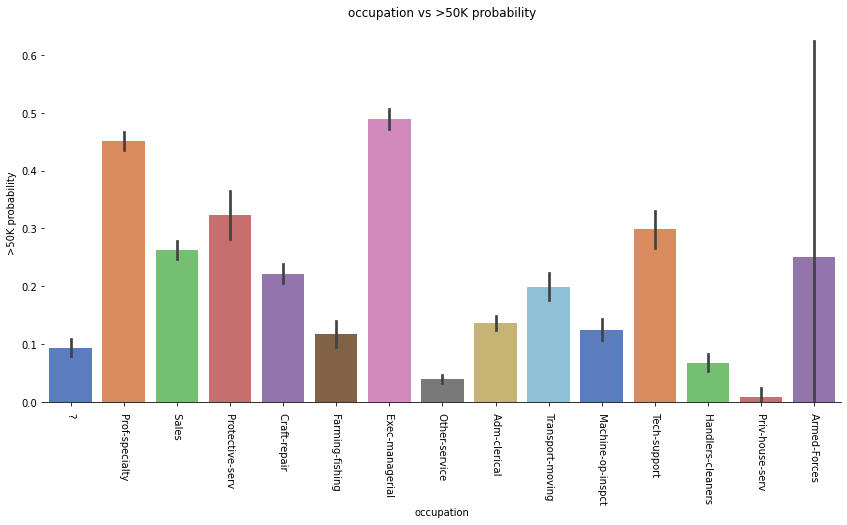

In [17]:
g = sns.catplot(x='occupation', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=2)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('occupation vs >50K probability')
plt.xticks(rotation=270)
plt.show()

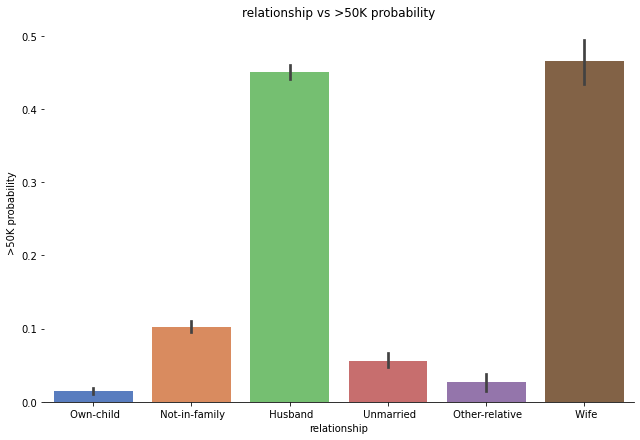

In [18]:
g = sns.catplot(x='relationship', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=1.5)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('relationship vs >50K probability')
plt.show()

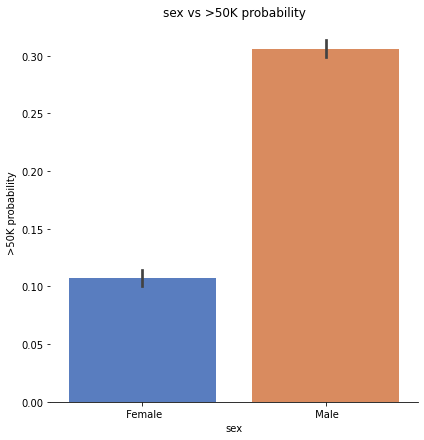

In [19]:
g = sns.catplot(x='sex', y='exceeds50K', data=df, kind='bar', height=6, palette='muted')
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('sex vs >50K probability')
plt.show()

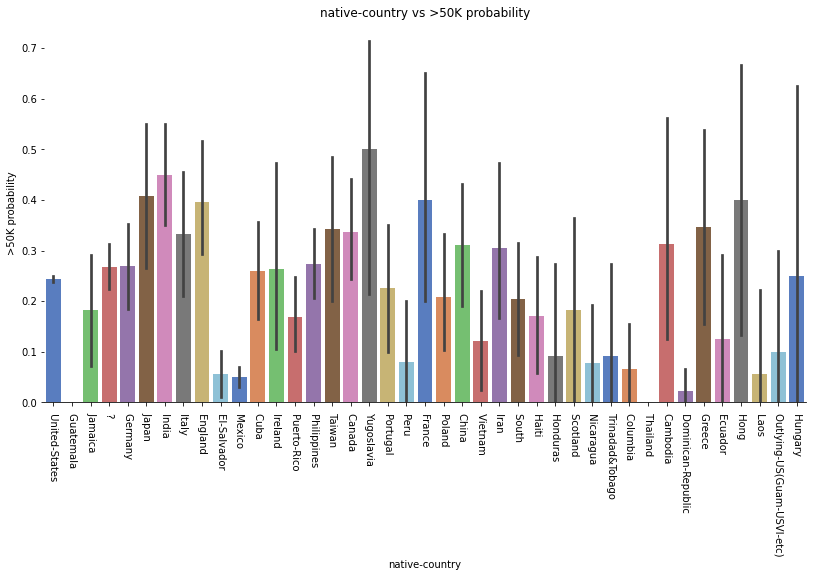

In [20]:
g = sns.catplot(x='native-country', y='exceeds50K', data=df, kind='bar', height=6, palette='muted', aspect=2)
g.despine(left=True)
g.set_ylabels('>50K probability')
plt.title('native-country vs >50K probability')
plt.xticks(rotation=270)
plt.show()

# 4. Feature Engineering

In [73]:
# convert sex code to 0 and 1
def reformatSexCode(dataset):
    dataset['sex'] = dataset['sex'].map({' Male': 0, ' Female': 1})
    dataset['sex'] = dataset['sex'].astype(int)

In [74]:
# convert marital-status to single and married
def reformatMaritalStatus(dataset):
    dataset["marital-status"] = dataset["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 0)
    dataset["marital-status"] = dataset["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 1)
    dataset["marital-status"] = dataset["marital-status"].astype(int)

In [75]:
# drop unwanted data
def dropUnwantedFeatures(dataset):
    dataset.drop(labels=['workclass', 'education', 'occupation', 'relationship', 'native-country'], axis=1, inplace=True)

In [76]:
reformatSexCode(df)
reformatMaritalStatus(df)
dropUnwantedFeatures(df)

print('Dataset to be used:')
df.head()

Dataset to be used:


,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,exceeds50K
0,30,147215,10,0,1,0,0,30,0
1,60,173960,13,0,1,0,0,42,0
2,52,105428,10,1,0,0,0,12,0
3,37,112497,13,1,0,0,0,60,0
4,63,137843,10,1,0,7298,0,48,1


# 5. Modelling

In [60]:
# split dataset into test set and training set 
x = df.drop(columns='exceeds50K')
y = df['exceeds50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

print(f'x_train.size: {x_train.shape[0]}')
print(f'y_train.size: {y_train.shape[0]}')
print(f'x_test.size: {x_test.shape[0]}')
print(f'y_test.size: {y_test.shape[0]}')

x_train.size: 18315
y_train.size: 18315
x_test.size: 6106
y_test.size: 6106


In [64]:
# Models Options: K-nearest neighbors, Logistic regression, Decision trees
#                 Random forest, Gradient boosting machine
model_names = ['KNN', 'LR', 'DT', 'RF', 'GBM']
df_acc = []
df_f1 = []


knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()

for classifier in (knn, lr, dt, rf, gbm):
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        
        f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
        acc = round(accuracy_score(y_test, y_pred) * 100, 2)
        
        df_acc.append(f1)
        df_f1.append(acc)
        
accuracy_record = pd.DataFrame({'Model': model_names, 'df_acc': df_acc})
accuracy_record.set_index('Model', inplace=True)

F1_record = pd.DataFrame({'Model': model_names, 'df_f1': df_f1})
F1_record.set_index('Model', inplace=True)

print(accuracy_record)
print('\n')
print(F1_record)

       df_acc
Model        
KNN     74.76
LR      76.60
DT      81.01
RF      84.08
GBM     85.56


       df_f1
Model       
KNN    77.40
LR     80.15
DT     80.97
RF     84.47
GBM    86.37


With the default setting in sklearn, Gradient boosting machine has the best perfermance.

Gradient boosting machine will be chosen to optimized.

In [66]:
grid_values = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]}
gsCV = GridSearchCV(gbm, param_grid=grid_values, scoring='accuracy', cv=10)

gsCV.fit(x_train, y_train)

params = gsCV.best_params_

print(f'Best hyperparameters: {params}')

loss = params['loss']
learning_rate = params['learning_rate']

best_gb = GradientBoostingClassifier(loss=loss, learning_rate=learning_rate)

best_gb.fit(x_train, y_train)
y_best_gb = best_gb.predict(x_test)

best_f1 = round(f1_score(y_test, y_best_gb, average='weighted') * 100, 2)
best_accuracy = round(accuracy_score(y_test, y_best_gb) * 100, 2)

print(f'\nAccuracy based on best selected model: {best_accuracy}')
print(f'Weighted F1 based on best selected model: {best_f1}')

Best hyperparameters: {'learning_rate': 0.1, 'loss': 'deviance'}

Accuracy based on best selected model: 86.37
Weighted F1 based on best selected model: 85.56


# 6. Finalize the model

In [86]:
# with the model best_gb

# read test data in csv
df_test = pd.read_csv('./cs5228/test.csv')

reformatSexCode(df_test)
reformatMaritalStatus(df_test)
dropUnwantedFeatures(df_test)

test_result = best_gb.predict(df_test)

df_result = pd.DataFrame({'id': np.arange(1, len(test_result)+1), 'prediction': test_result})
print(df_result)

df_result.to_csv("./cs5228/prediction.csv",index=False,sep=',')

          id  prediction
0          1           0
1          2           0
2          3           0
3          4           0
4          5           0
...      ...         ...
24416  24417           0
24417  24418           0
24418  24419           0
24419  24420           0
24420  24421           0

[24421 rows x 2 columns]


# 7. Submission Result

One predict result of this model has been submitted.

The score is 86.093%